In [1]:
import IPython.display as ipd

import numpy as np
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import math

TAU = math.pi * 2

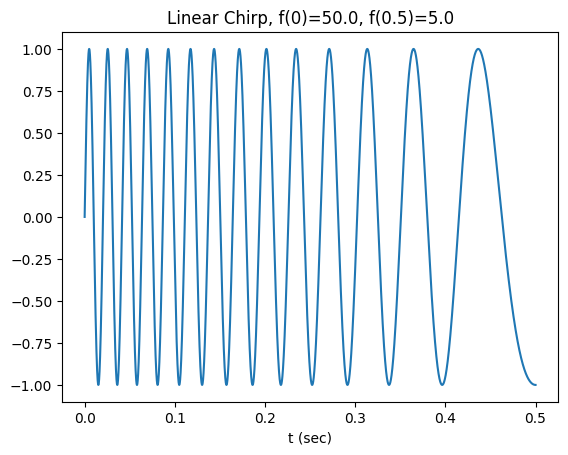

In [7]:
f0 = 50.
f1 = 5.
T = 0.5

t = np.linspace(0, T, 48000)
w = chirp(t, f0=f0, f1=f1, t1=T, method='linear', phi=270.)

plt.plot(t, w)
plt.title(f"Linear Chirp, f(0)={f0}, f({T})={f1}")
plt.xlabel('t (sec)')
plt.show()

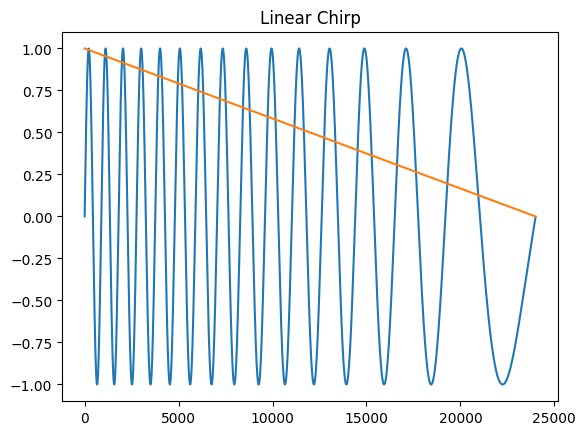

In [3]:
# parameters
T = 0.5
F1 = 50.
F0 = 5.
linear = True

# constants
fs = 48000.
num_samples = int(fs * T) 
chirp_rate = F1 / num_samples
pd0 = F0 / fs

# state
p0 = 0.
p1 = 0.
f1 = F1

# generate signal
signal1 = []
signal2 = []
signal3 = []
signal4 = []
for x in list(range(num_samples)):    
    # chirp signal
    y = math.sin(TAU * (p0 + p1))
    signal1.append(y)
    
    # linear
    if linear:
        f1 -= chirp_rate
        signal2.append(f1 / F1)
    # curve
    else:
        k = .3
        c = 1.0 - (x**k / num_samples**k)
        f1 = c * F1
        signal2.append(f1 / F1)
    
    # phase accumulators
    p0 += pd0
    if p0 >= 1.:
        p0 -= 1.
        
    p1 += (f1 / fs) 
    if p1 >= 1.:
        p1 -= 1.

    
        
# plot signals
ys1 = np.array(signal1)
ys2 = np.array(signal2)
ys3 = np.array(signal3)
ys4 = np.array(signal4)
xs = np.arange(num_samples)
plt.title("Linear Chirp")
plt.plot(xs, ys1)
plt.plot(xs, ys2)
#plt.plot(xs, ys3)
#plt.plot(xs, ys4)
plt.show()

In [8]:
def chirp_linear(fs, T, F1, F0):
    # constants
    pd0 = F0 / fs
    chirp_rate = F1 / (T*fs)

    # state
    p0 = 0.
    p1 = 0.
    f1 = F1
    
    # generate signal
    signal = []
    num_samples = int(fs * T) 
    for x in list(range(num_samples)):    
        # chirp signal
        y = math.sin(TAU * (p0 + p1))
        signal.append(y)

        # phase accumulators
        p0 += pd0
        if p0 >= 1.:
            p0 -= 1.
        p1 += (f1 / fs) 
        if p1 >= 1.:
            p1 -= 1.

        # update f1
        f1 -= chirp_rate
        
    return signal

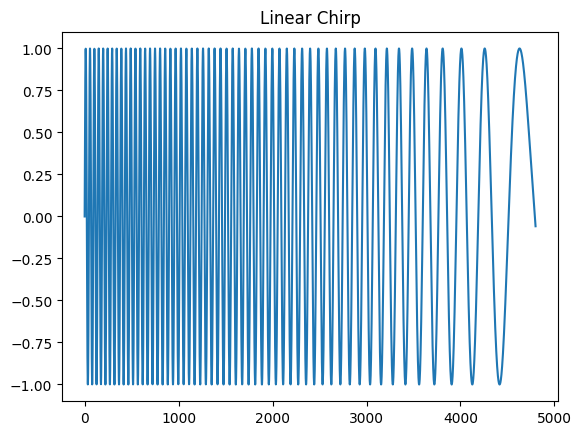

In [9]:
fs = 48000.
T  = 0.1
signal = chirp_linear(fs, T, 1000., 55.)

ys = np.array(signal)
xs = np.arange(ys.size)
plt.title("Linear Chirp")
plt.plot(xs, ys)
plt.show()

import IPython.display as ipd
ipd.Audio(signal, rate=fs)